# **Data Processing**
The original sales data was exported from Trendyol Seller Panel in .csv format and included various product-level and customer-level attributes. The following preprocessing steps were applied to clean and enrich the dataset for analysis:

##  Importing Libraries and Mounting Google Drive

- I began by importing essential libraries for data manipulation and visualization.  
- I also mounted my Google Drive to access the raw sales dataset.


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os.path import join

drive.mount('/content/drive', force_remount=True)

satisraporu = "/content/drive/MyDrive/dsaproje/agustossatis.csv"

Mounted at /content/drive


## Reading and Cleaning the Raw Sales Data

- I read the CSV file using pandas and standardized the column names by removing whitespace and converting to lowercase.  
- I then removed irrelevant columns such as shipping info, internal tracking data, and tax fields to keep the dataset focused.


In [97]:
df = pd.read_csv(satisraporu, delimiter=";")

df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

irrelevant_columns = ['barkod', 'kargoya_teslim_tarihi','komisyon_oranı', 'teslim_tarihi', 'ülke', 'sipariş_statüsü', 'stok_kodu','district', 'paket_no', 'kargo_firması', 'termin_süresinin_bittiği_tarih','alıcı_-_fatura_adresi','vergi_dairesi','e-posta', 'fatura_adresi', 'şirket_i̇smi','alternatif_teslimat_statüsü','faturalanan_kargo_tutarı', 'marka','butik_numarası','i̇ndirim_tutarı',	'trendyol_i̇ndirim_tutarı','faturalanacak_tutar','teslimat_adresi','kargodan_alınan_desi','hesapladığım_desi','kurumsal_faturalı_sipariş','fatura','müşteri_sipariş_adedi', 'vergi_kimlik_numarası','mikro_i̇hracat','etgb_no', 'etgb_tarihi', 'kargo_kodu','sipariş_numarası','kargo_partner_i̇smi', '2.teslimat_paketi_statüsü','2.teslimat_takip_numarası','teslimat_numarası','fatura_no','fatura_tarihi','müşteri_telefon_no']

df.drop(columns=[col for col in irrelevant_columns if col in df.columns], inplace=True)

df.head()

,order_date,customer,city,product_name,quantity,unit_price,total_revenue,age,gender
0,04.08.2024 01:52,Uğur Koca,İstanbul,"Hbf514bw1t Beyaz Ankastre Fırın HBF514BW1T, on...",1,10535.0,10535.0,NaN,Male
1,04.08.2024 03:40,Tuğçe Esra Özbey,Bursa,GSV33VIE0N Inox 7 Çekmeceli Derin Dondurucu GS...,1,16571.0,16571.0,NaN,Not Specified
2,04.08.2024 03:52,fethi doğan,Elazığ,Wga142x2tr 9 Kg 1200 Devir A Enerji Sınıfı Bey...,1,16170.0,16170.0,NaN,Male
3,04.08.2024 03:52,fethi doğan,Elazığ,"Hbf514bw1t Beyaz Ankastre Fırın HBF514BW1T, on...",1,10535.0,10535.0,NaN,Male
4,04.08.2024 05:06,Sadegül ÖNAL,Kastamonu,Sms4ıkw62t 6 Programlı Beyaz Bulaşık Makinesi ...,1,16095.0,16095.0,21-30,Female


## Category Extraction Function
- The original dataset did not have a product category column so I extracted the category names from the product name.
- I also removed the product_name column to have a cleaner data since I was only interested in the product category.

In [98]:
def kategori_belirle(urun_adi):
    name = str(urun_adi).lower()


    if "kurutma" in name:
        return "Dryer"
    elif "çamaşır" in name or "wga25" in name:
        return "Washing Machine"
    elif "kıyma" in name:
        return "Meat Grinder"
    elif "bulaşık" in name or "sms4" in name:
        return "Dishwasher"
    elif "fırın" in name:
        return "Oven"
    elif "solo soğ." in name or "buzdolabı" in name or "kgn86" in name:
        return "Refrigerator"
    elif "süpürge" in name or "bbs6" in name:
        return "Vacuum Cleaner"
    elif "kahve" in name:
        return "Coffee Machine"
    elif "mikser" in name or "mfq3010" in name:
        return "Mixer"
    elif "mmr08r2" in name or "blender" in name or "ms6cb" in name:
        return "Blender"
    elif "robot" in name or "mutfak" in name:
        return "Kitchen Robot"
    elif "ocak" in name:
        return "Cooktop"
    elif "davlumbaz" in name or "aspiratör" in name:
        return "Extractor Hood"
    elif "cam su" in name or "çay makinesi" in name or "kettle" in name:
        return "Kettle/Tea Maker"
    elif "derin" in name:
        return "Deep Freezer"
    elif "tost" in name:
        return "Toaster"
    elif "ekmek" in name:
        return "Toaster (Bread)"
    elif "toz tor" in name:
        return "Dust Bag"
    else:
        return "Other"

df['category'] = df['product_name'].apply(kategori_belirle)

df.drop(columns=['product_name'], inplace=True)

df.head()


,order_date,customer,city,quantity,unit_price,total_revenue,age,gender,category
0,04.08.2024 01:52,Uğur Koca,İstanbul,1,10535.0,10535.0,NaN,Male,Oven
1,04.08.2024 03:40,Tuğçe Esra Özbey,Bursa,1,16571.0,16571.0,NaN,Not Specified,Deep Freezer
2,04.08.2024 03:52,fethi doğan,Elazığ,1,16170.0,16170.0,NaN,Male,Washing Machine
3,04.08.2024 03:52,fethi doğan,Elazığ,1,10535.0,10535.0,NaN,Male,Oven
4,04.08.2024 05:06,Sadegül ÖNAL,Kastamonu,1,16095.0,16095.0,21-30,Female,Dishwasher


## Extracting Date-Time Features

  - I converted the `order_date` column to datetime format.  
Based on this column, I extracted:
- the hour of purchase (`hour`)
- the weekday (`day_of_week`)
- whether the purchase was on a weekend (`is_weekend`)


In [99]:
df['order_date'] = pd.to_datetime(df['order_date'], format="%d.%m.%Y %H:%M", errors='coerce')


df['hour'] = df['order_date'].dt.hour
df['day_of_week'] = df['order_date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

df.head()

,order_date,customer,city,quantity,unit_price,total_revenue,age,gender,category,hour,day_of_week,is_weekend
0,2024-08-04 01:52:00,Uğur Koca,İstanbul,1,10535.0,10535.0,NaN,Male,Oven,1,Sunday,True
1,2024-08-04 03:40:00,Tuğçe Esra Özbey,Bursa,1,16571.0,16571.0,NaN,Not Specified,Deep Freezer,3,Sunday,True
2,2024-08-04 03:52:00,fethi doğan,Elazığ,1,16170.0,16170.0,NaN,Male,Washing Machine,3,Sunday,True
3,2024-08-04 03:52:00,fethi doğan,Elazığ,1,10535.0,10535.0,NaN,Male,Oven,3,Sunday,True
4,2024-08-04 05:06:00,Sadegül ÖNAL,Kastamonu,1,16095.0,16095.0,21-30,Female,Dishwasher,5,Sunday,True


## Gender Data

- The original dataset was missing gender information for almost 50% of the customers.  
- To conduct a more comprehensive demographic analysis, I estimated gender using a name-based approach.

- For this purpose, I used external datasets available on GitHub that contain frequency statistics of male, female, and unisex Turkish names.  
- By extracting the first name from each customer's full name and normalizing Turkish characters, I was able to match names against these datasets.

- A new column, `guessed_gender`, was added to the dataset based on the result of this process.  
- This allowed me to include gender as a variable in my visualizations and hypothesis testing.


## Turkish Name-Frequency Data
- Firstly, to estimate the gender of the customer, I uploaded the data I found on GitHub.

In [100]:
female_raw = pd.read_csv("/content/drive/MyDrive/dsaproje/female_name_tally", header=None, names=["raw"])
male_raw = pd.read_csv("/content/drive/MyDrive/dsaproje/male_name_tally", header=None, names=["raw"])
unisex_raw = pd.read_csv("/content/drive/MyDrive/dsaproje/unisex_name_tally_filtered", header=None, names=["raw"])

female_raw.head()

,raw
0,FATMA 1228293
1,AYSE 969973
2,EMINE 787293
3,HATICE 687368
4,ZEYNEP 333301


- Then I cleaned the data using the process_name_freq function
- This function extracted the name and frequency columns, converted the text to lowercase, and removed any formatting issues.


In [101]:
def process_name_freq(df):
  df[['name', 'frequency']] = df['raw'].str.extract(r'(\D+)\s+(\d+)', expand=True)
  df = df.dropna(subset=['name', 'frequency']).copy()
  df['name'] = df['name'].str.strip().str.lower()
  df['frequency'] = df['frequency'].astype(int)

  return df.drop(columns=['raw'])

female_df = process_name_freq(female_raw)
male_df = process_name_freq(male_raw)
unisex_df = process_name_freq(unisex_raw)

## Name Normalization
- I created an additional function to match customer names with the name frequency datasets.  
  Since the names in the dataset did not contain Turkish characters, I also removed special Turkish letters  
  (e.g., "ş", "ç", "ö") from the customer names to ensure consistency during the matching process.


In [102]:
def normalize_turkish(name):
    replacements = {
        'Ç': 'c', 'ç': 'c',
        'Ğ': 'g', 'ğ': 'g',
        'I': 'i', 'ı': 'i',
        'İ': 'i',
        'Ö': 'o', 'ö': 'o',
        'Ş': 's', 'ş': 's',
        'Ü': 'u', 'ü': 'u'
    }
    name = str(name).strip()
    for turkish, ascii in replacements.items():
        name = name.replace(turkish, ascii)
    name = name.lower()
    return name

df['normalized_name'] = df['customer'].apply(normalize_turkish)

## Gender Estimation

- To estimate customer gender, I implemented a function that extracts the first name from the full name.  
- The extracted name is then compared against male and female name frequency datasets.  
- If the name appears in both (i.e., unisex), the label is assigned based on the higher frequency.  
- If the name is not found in either dataset, the gender is labeled as `"Unknown"`.
- I also removed the customer name and gender columns since they were no longer necessary.


With this process, I was able to assign a gender label to all customers except for four.  
These remaining entries either contained typos, non-Turkish names, or appeared to belong to companies rather than individuals.


In [103]:
def infer_gender_from_name(name):
    name = normalize_turkish(str(name).split()[0])
    male_freq = male_df[male_df['name'] == name]['frequency'].sum()
    female_freq = female_df[female_df['name'] == name]['frequency'].sum()

    if male_freq > 0 and female_freq > 0:
        return "Male" if male_freq > female_freq else "Female"
    elif male_freq > 0:
        return "Male"
    elif female_freq > 0:
        return "Female"
    else:
        return "Unknown"

df['guessed_gender'] = df['normalized_name'].apply(infer_gender_from_name)

#df.drop(columns=['gender', 'customer', 'normalized_name'], inplace=True, errors='ignore') #remove the columns

df.head()

,order_date,customer,city,quantity,unit_price,total_revenue,age,gender,category,hour,day_of_week,is_weekend,normalized_name,guessed_gender
0,2024-08-04 01:52:00,Uğur Koca,İstanbul,1,10535.0,10535.0,NaN,Male,Oven,1,Sunday,True,ugur koca,Male
1,2024-08-04 03:40:00,Tuğçe Esra Özbey,Bursa,1,16571.0,16571.0,NaN,Not Specified,Deep Freezer,3,Sunday,True,tugce esra ozbey,Female
2,2024-08-04 03:52:00,fethi doğan,Elazığ,1,16170.0,16170.0,NaN,Male,Washing Machine,3,Sunday,True,fethi dogan,Male
3,2024-08-04 03:52:00,fethi doğan,Elazığ,1,10535.0,10535.0,NaN,Male,Oven,3,Sunday,True,fethi dogan,Male
4,2024-08-04 05:06:00,Sadegül ÖNAL,Kastamonu,1,16095.0,16095.0,21-30,Female,Dishwasher,5,Sunday,True,sadegul onal,Female


- I ran a chi-square independence test to make sure the results of the gender estimation are reliable.

In [113]:
from scipy.stats import chi2_contingency
import pandas as pd

# 1. Veriyi filtrele: sadece gerçek gender'ın bilindiği satırları al
df_valid = df.dropna(subset=['gender'])

# 3. Chi-square testi
chi2, p, dof, expected = chi2_contingency(confusion)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# 4. Yorumu ekle
if p < 0.05:
    print("\n There is a statistically significant relationship between guessed and actual gender.")
else:
    print("\n There is no statistically significant relationship between guessed and actual gender.")



Chi-square Statistic: 127.39877247259064
Degrees of Freedom: 4
P-value: 1.4015487801791106e-26

 There is a statistically significant relationship between guessed and actual gender.


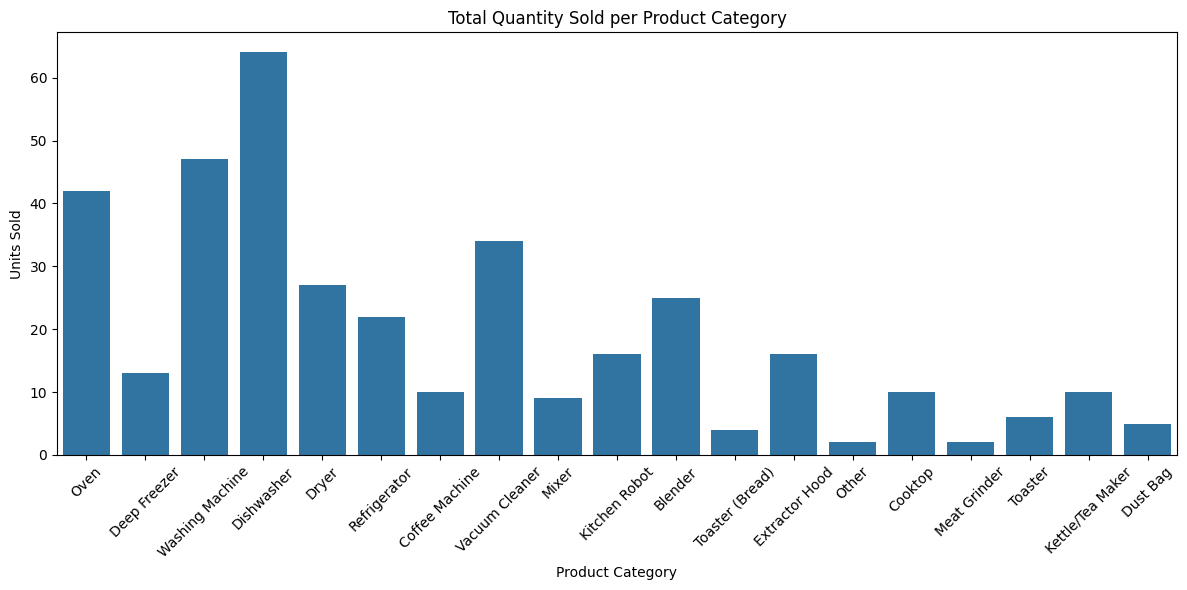

In [107]:
# 2. Total Quantity Sold by Category
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='quantity', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title("Total Quantity Sold per Product Category")
plt.ylabel("Units Sold")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


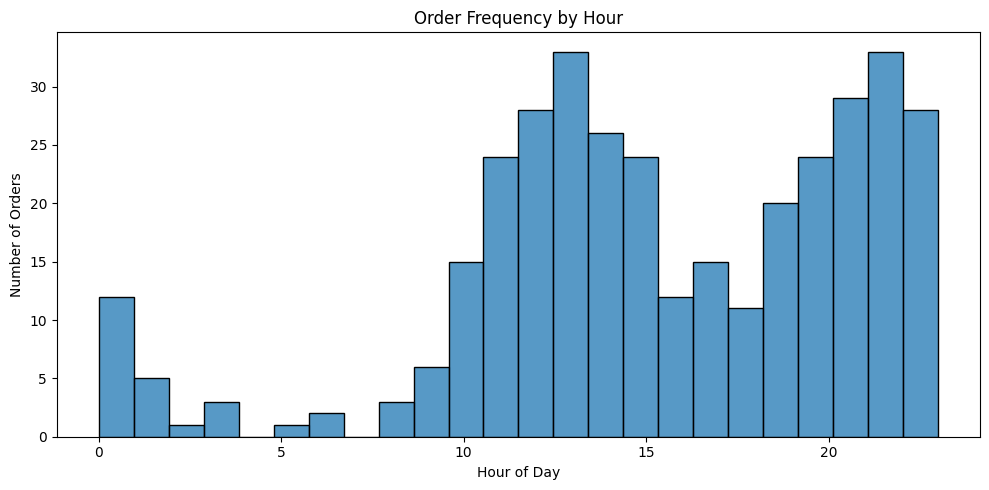

In [108]:
# 3. Order Count by Hour of Day
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', bins=24, kde=False, stat="count")
plt.title("Order Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


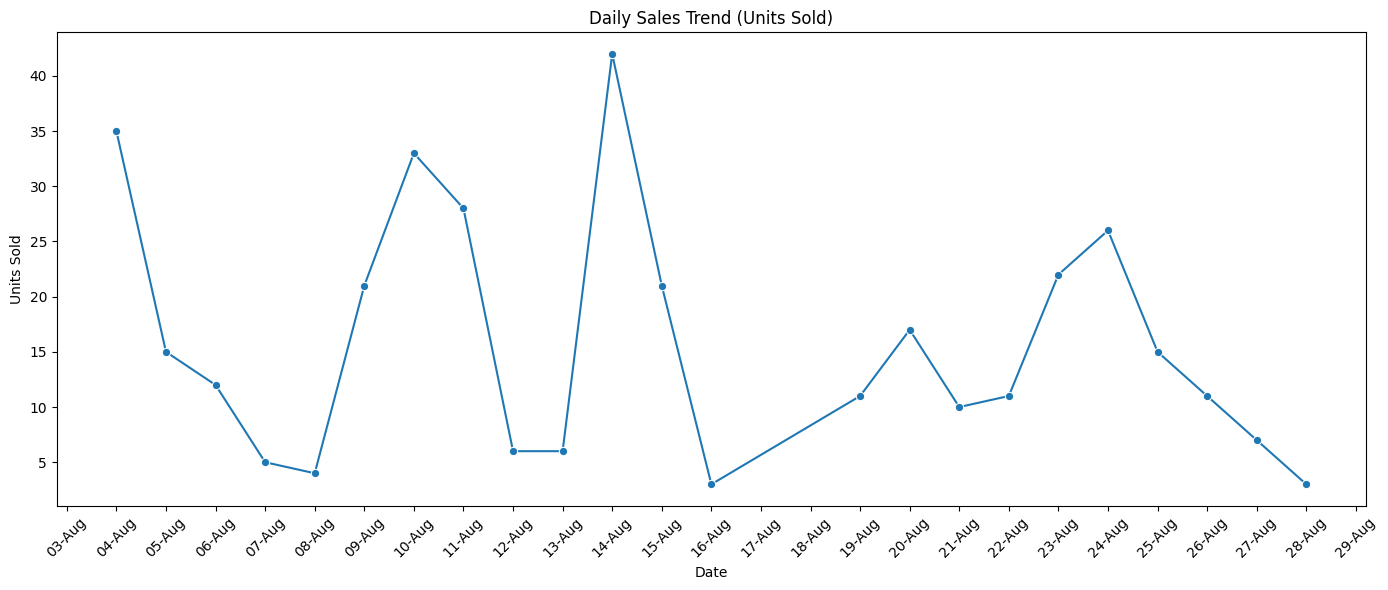

In [112]:
import matplotlib.dates as mdates

df['order_date_only'] = pd.to_datetime(df['order_date']).dt.date
daily_sales = df.groupby('order_date_only')['quantity'].sum().reset_index()

daily_sales['order_date_only'] = pd.to_datetime(daily_sales['order_date_only'])

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=daily_sales, x='order_date_only', y='quantity', marker='o')

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.xticks(rotation=45)
plt.title("Daily Sales Trend (Units Sold)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


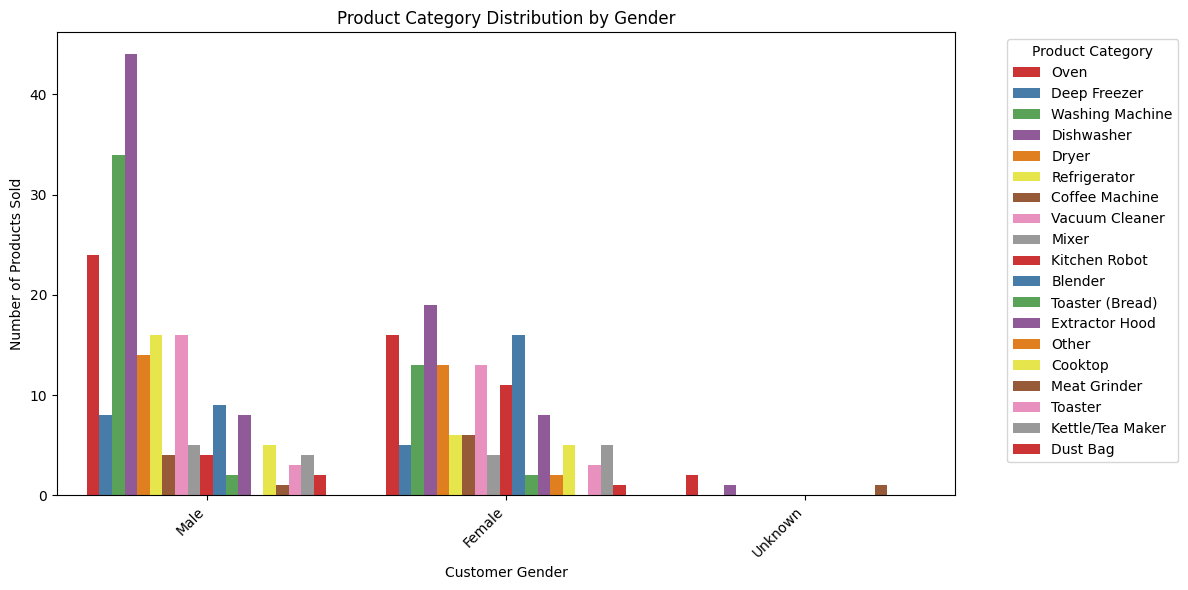

In [ ]:
# Visualizing Product Category by Customer Gender
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.countplot(x='guessed_gender', hue='category', data=df, palette="Set1", dodge=True)  # Changes here
plt.title("Product Category Distribution by Gender")
plt.ylabel("Number of Products Sold")
plt.xlabel("Customer Gender")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Drop missing gender/category values
df_chi = df[['guessed_gender', 'category']].dropna()

# Create contingency table
contingency = pd.crosstab(df_chi['guessed_gender'], df_chi['category'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square value:", round(chi2, 4))
print("p-value:", round(p, 4))
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Reject H₀ → Gender and category are associated.")
else:
    print("Fail to reject H₀ → No significant association between gender and category.")


Chi-square value: 52.1014
p-value: 0.0403
Degrees of freedom: 36
Reject H₀ → Gender and category are associated.


In [ ]:
from scipy.stats import ttest_ind

# Group data
weekend_sales = df[df['is_weekend'] == True]['quantity']
weekday_sales = df[df['is_weekend'] == False]['quantity']

# t-test
stat, p = ttest_ind(weekend_sales, weekday_sales, equal_var=False)

print("t-statistic:", round(stat, 4))
print("p-value:", round(p, 4))

if p < 0.05:
    print("Reject H₀ → Sales differ between weekdays and weekends.")
else:
    print("Fail to reject H₀ → No significant difference in sales.")


t-statistic: 1.0546
p-value: 0.2928
Fail to reject H₀ → No significant difference in sales.


In [ ]:
from scipy.stats import f_oneway

# Group by hour
hourly_groups = [group['quantity'].values for _, group in df.groupby('hour') if len(group) > 1]

# Run ANOVA
f_stat, p = f_oneway(*hourly_groups)

print("F-statistic:", round(f_stat, 4))
print("p-value:", round(p, 4))

if p < 0.05:
    print("Reject H₀ → Sales quantities differ significantly by hour.")
else:
    print("Fail to reject H₀ → No significant difference by hour.")


F-statistic: 0.8624
p-value: 0.6304
Fail to reject H₀ → No significant difference by hour.
